In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import SCM6
import cartopy.crs as ccrs
import matplotlib.colors as colors
import paleoclim_leeds.hadcm3_processing as hcm3

# DEMO CLIMATE-ICE

In [4]:
amoc = hcm3.MERIDATS('xosfb', 2552, 2562).atlantic(mode_t='mean')
amoc

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> : xosfb between years 2552 and 2562.
TEST 0 : /nfs/see-fs-01_users/eeymr/database/xosfb/time_series/xosfb.merid.annual.nc
TEST 1 0.0
Time elapsed for open_dataset : 0.19027924537658691
TEST 2 0.0
Time elapsed for crop start year : 0.40137815475463867
TEST 3 0.0
Time elapsed for crop start and end years : 0.5624854564666748
TEST 4 0.0
Time elapsed for crop start and end years and months : 0.6582164764404297
TEST 5 0.0
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing meridional Overturning Stream Function (Atlantic).
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.


lon: None; lon_p: None
lonb: None; lonb_p: None
lons: None; lons_p: None
lat: [-88.75; -87.5; ...; 87.5; 88.75; 143]; lat_p: [-88.75; -87.5; ...; 88.75; 90.0; 144]
latb: [-89.375; -88.125; ...; 88.125; 89.375; 144]; latb_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [0.0; 10.0; ...; 4884.7998046875; 5500.099609375; 21]; z_p: [0.0; 10.0; ...; 4884.7998046875; 5500.099609375; 21]
zb: [-5.0; 5.0; ...; 5192.44970703125; 5807.74951171875; 22]; zb_p: [-5.0; 5.0; ...; 5192.44970703125; 5807.74951171875; 22]
zs: [10.0; 10.0; ...; 615.2998046875; 615.2998046875; 21]; zs_p: [10.0; 10.0; ...; 615.2998046875; 615.2998046875; 21]
t: None
DATA: <xarray.DataArray 'Merid_Atlantic' (z: 21, latitude: 143)>
array([[           nan,            nan,            nan, ...,
         0.0000000e+00,  0.0000000e+00,            nan],
       [           nan,            nan,            nan, ...,
         2.8517419e-02,  1.548566

In [5]:
ds = hcm3.MERIDATS('xosfb', 2552, 2562)
ds

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> : xosfb between years 2552 and 2562.
TEST 0 : /nfs/see-fs-01_users/eeymr/database/xosfb/time_series/xosfb.merid.annual.nc
TEST 1 0.0
Time elapsed for open_dataset : 0.1894991397857666
TEST 2 0.0
Time elapsed for crop start year : 0.4008219242095947
TEST 3 0.0
Time elapsed for crop start and end years : 0.560950756072998
TEST 4 0.0
Time elapsed for crop start and end years and months : 0.6558821201324463
TEST 5 0.0
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


lon: None; lon_p: None
lonb: None; lonb_p: None
lons: None; lons_p: None
lat: [-88.75; -87.5; ...; 87.5; 88.75; 143]; lat_p: [-88.75; -87.5; ...; 88.75; 90.0; 144]
latb: [-89.375; -88.125; ...; 88.125; 89.375; 144]; latb_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [0.0; 10.0; ...; 4884.7998046875; 5500.099609375; 21]; z_p: [0.0; 10.0; ...; 4884.7998046875; 5500.099609375; 21]
zb: [-5.0; 5.0; ...; 5192.44970703125; 5807.74951171875; 22]; zb_p: [-5.0; 5.0; ...; 5192.44970703125; 5807.74951171875; 22]
zs: [10.0; 10.0; ...; 615.2998046875; 615.2998046875; 21]; zs_p: [10.0; 10.0; ...; 615.2998046875; 615.2998046875; 21]
t: [2552-06-01 00:00:00; 2553-06-01 00:00:00; ...; 2561-06-01 00:00:00; 2562-06-01 00:00:00; 11]
DATA: <xarray.Dataset>
Dimensions:         (depth: 21, latitude: 143, t: 11)
Coordinates:
  * depth           (depth) float32 0.0 10.0 20.0 ... 4269.5 4884.8 5500.0996
  * latitude        

In [7]:
print(f"TEST 5 {np.nansum(ds.data.Merid_Atlantic.values[:10] - xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfb/time_series/xosfb.merid.annual.nc').Merid_Atlantic.values[:10])}")

TEST 5 0.0


In [ ]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.pcolormesh(amoc.lat[50:200],  amoc.z, amoc.values(processing=False)[:,50:200], cmap=SCM6.vik)
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')
figMap.colorbar(mappable=cm, ax=axMap, label="Atlantic stream function (Sv)")

In [4]:
amoc_r = xr.open_dataset("/nfs/see-fs-01_users/eeymr/database/xoupb/time_series/xoupb.merid.annual.nc").Merid_Atlantic
amoc_r

<xarray.DataArray 'Merid_Atlantic' (t: 3999, depth: 21, latitude: 143)>
[12008997 values with dtype=float32]
Coordinates:
  * depth     (depth) float32 0.0 10.0 20.0 30.0 ... 4269.5 4884.8 5500.0996
  * latitude  (latitude) float32 -88.75 -87.5 -86.25 -85.0 ... 86.25 87.5 88.75
  * t         (t) object 1001-06-01 00:00:00 ... 4999-06-01 00:00:00
Attributes:
    long_name:  Meridional Overturning Stream Function (Atlantic)
    units:      Sv

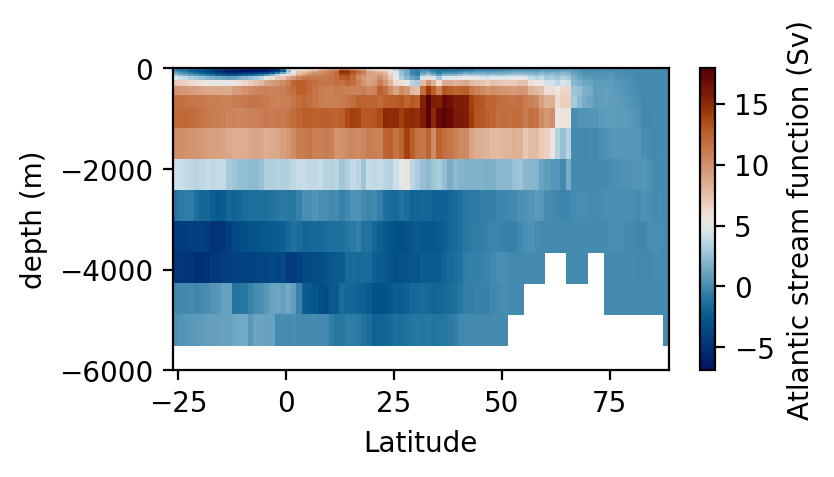

In [12]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.pcolormesh(amoc_r.latitude[50:], -amoc_r.depth, amoc_r.isel(t=0).values[:,50:], cmap=SCM6.vik)
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')
axMap.set_ylim([-6000, 0])
figMap.colorbar(mappable=cm, ax=axMap, label="Atlantic stream function (Sv)")

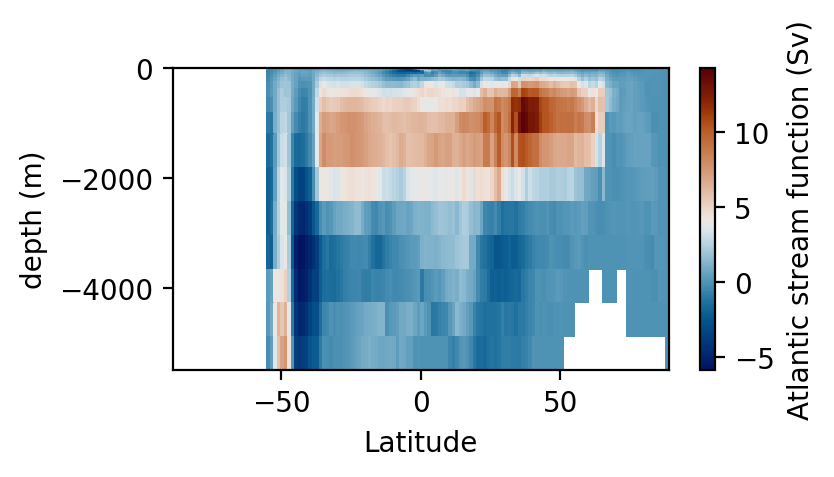

In [20]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.pcolormesh(amoc_r.latitude, -amoc_r.depth, amoc_r.isel(t=0).values - ds.data.values[::,::], cmap=SCM6.vik)
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')
figMap.colorbar(mappable=cm, ax=axMap, label="Atlantic stream function (Sv)")

In [3]:
ds = hcm3.MERIDATS('xosfb', 3000, 3010).atlantic(mode_t='mean')
ds

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> : xosfb between years 3000 and 3010.


ValueError: operands could not be broadcast together with shapes (4000,21,143) (3999,21,143) 

In [8]:
ds.data

<xarray.DataArray 'Merid_Atlantic' (z: 21, latitude: 143)>
array([[           nan,            nan,            nan, ...,
         0.0000000e+00,  0.0000000e+00,            nan],
       [           nan,            nan,            nan, ...,
        -2.9100974e-03,  4.2661722e-03,            nan],
       [           nan,            nan,            nan, ...,
        -4.4801375e-03,  1.1341355e-03,            nan],
       ...,
       [           nan,            nan,            nan, ...,
        -1.1175871e-08, -1.8299192e-03,            nan],
       [           nan,            nan,            nan, ...,
                   nan,  3.5390258e-08,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
  * z         (z) float32 0.0 10.0 20.0 30.0 ... 3654.3 4269.5 4884.8 5500.0996
  * latitude  (latitude) float32 -88.75 -87.5 -86.25 -85.0 ... 86.25 87.5 88.75

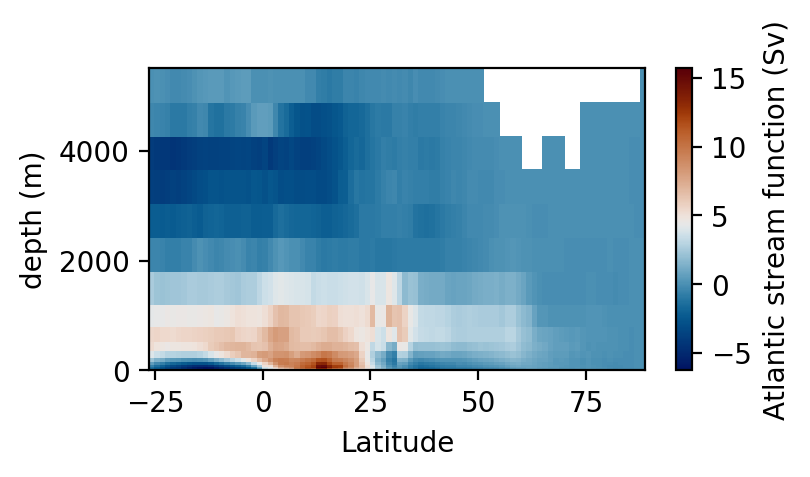

In [13]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.pcolormesh(ds.data.latitude[50:], ds.data.z, ds.data.values[:,50:], cmap=SCM6.vik)
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')
figMap.colorbar(mappable=cm, ax=axMap, label="Atlantic stream function (Sv)")

In [8]:
xr.open_dataset("/nfs/see-fs-01_users/eeymr/database/xoupb/time_series/xoupb.merid.annual.nc").Merid_Atlantic

<xarray.DataArray 'Merid_Atlantic' (t: 3999, depth: 21, latitude: 143)>
[12008997 values with dtype=float32]
Coordinates:
  * depth     (depth) float32 0.0 10.0 20.0 30.0 ... 4269.5 4884.8 5500.0996
  * latitude  (latitude) float32 -88.75 -87.5 -86.25 -85.0 ... 86.25 87.5 88.75
  * t         (t) object 1001-06-01 00:00:00 ... 4999-06-01 00:00:00
Attributes:
    long_name:  Meridional Overturning Stream Function (Atlantic)
    units:      Sv

### Time extent

In [4]:
sat = hcm3.ATMSURFMDS('xosfb', 10000, 3010).sat(mode_t='mean')
sat

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 10000 and 3010.
____ Import succeeded.
No dataset to import. Please check again the import options.


IndexError: list index out of range

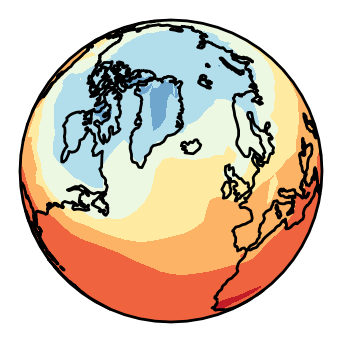

In [10]:
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=60, satellite_height=7000000)

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sat.lon_p, sat.lat_p, sat.values(), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_global()

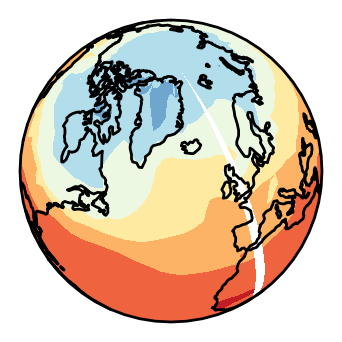

In [11]:
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=60, satellite_height=7000000)

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sat.lon, sat.lat, sat.values(processing=False), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_global()

In [13]:
sst = hcm3.OCNMDS('xosfb', 3000, 3010).sst(mode_t='mean')
sst

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SST.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [0.0; 1.25; ...; 357.5; 358.75; 288]; lon_p: [0.0; 1.25; ...; 358.75; 360.0; 289]
lonb: [0.625; 1.875; ...; 358.125; 359.375; 288]; lonb_p: [0.625; 1.875; ...; 359.375; 360.625; 289]
lons: [1.25; 1.25; ...; 1.25; 1.25; 287]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 288]
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-88.75; -87.5; ...; 87.5; 88.75; 143]; latb_p: [-90.0; -88.75; ...; 88.75; 90.0; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-10.0; -20.0; ...; -242.60000610351562; -359.3999938964844; 10]; z_p: [-10.0; -20.0; ...; -242.60000610351562; -359.3999938964844; 10]
zb: [-5.0; -15.0; ...; -203.6999969482422; -301.0; 10]; zb_p: [-5.0; -15.0; ...; -301.0; -417.79998779296875; 11]
zs: [-10.0; -10.0; ...; -64.80000305175781; -97.30000305175781; 9]; zs_p: [-10.0; -10.0; ...; -97.30000305175781; -116.79998779296875; 10]
t: None
DATA: <xarray.DataArray 'temp_mm_uo' (latitude

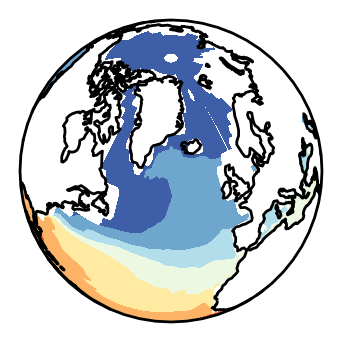

In [14]:
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=60, satellite_height=7000000)

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sst.lon, sst.lat, sst.values(processing=False), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_global()

In [6]:
sst = hcm3.OCNMDS('xosfb', 3000, 3010).sst(mode_lon='value', value_lon=300, mode_lat='mean')
sst

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SST.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ New longitude value : 300.0


lon: [299.375; 1]; lon_p: [299.375; 1]
lonb: [299.375; 1]; lonb_p: [299.375; 1]
lons: None; lons_p: None
lat: None; lat_p: None
latb: None; latb_p: None
lats: None; lats_p: None
z: [-10.0; -20.0; ...; -242.60000610351562; -359.3999938964844; 10]; z_p: [-10.0; -20.0; ...; -242.60000610351562; -359.3999938964844; 10]
zb: [-5.0; -15.0; ...; -203.6999969482422; -301.0; 10]; zb_p: [-5.0; -15.0; ...; -301.0; -417.79998779296875; 11]
zs: [-10.0; -10.0; ...; -64.80000305175781; -97.30000305175781; 9]; zs_p: [-10.0; -10.0; ...; -97.30000305175781; -116.79998779296875; 10]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_uo' (t: 132)>
array([7.8177714, 7.7805285, 7.5840592, 7.462605 , 7.4127502, 7.646072 ,
       7.9350615, 8.206808 , 8.226928 , 7.935869 , 7.763104 , 7.7264857,
       7.88941  , 7.7204804, 7.493488 , 7.238037 , 7.2954946, 7.7683883,
       8.054811 , 8.279596 , 8.419786 , 8.073674 , 7.736496 , 7.80

In [7]:
sst.t

array([cftime.Datetime360Day(3000-01-01 00:00:00),
       cftime.Datetime360Day(3000-02-01 00:00:00),
       cftime.Datetime360Day(3000-03-01 00:00:00),
       cftime.Datetime360Day(3000-04-01 00:00:00),
       cftime.Datetime360Day(3000-05-01 00:00:00),
       cftime.Datetime360Day(3000-06-01 00:00:00),
       cftime.Datetime360Day(3000-07-01 00:00:00),
       cftime.Datetime360Day(3000-08-01 00:00:00),
       cftime.Datetime360Day(3000-09-01 00:00:00),
       cftime.Datetime360Day(3000-10-01 00:00:00),
       cftime.Datetime360Day(3000-11-01 00:00:00),
       cftime.Datetime360Day(3000-12-01 00:00:00),
       cftime.Datetime360Day(3001-01-01 00:00:00),
       cftime.Datetime360Day(3001-02-01 00:00:00),
       cftime.Datetime360Day(3001-03-01 00:00:00),
       cftime.Datetime360Day(3001-04-01 00:00:00),
       cftime.Datetime360Day(3001-05-01 00:00:00),
       cftime.Datetime360Day(3001-06-01 00:00:00),
       cftime.Datetime360Day(3001-07-01 00:00:00),
       cftime.Datetime360Day(30

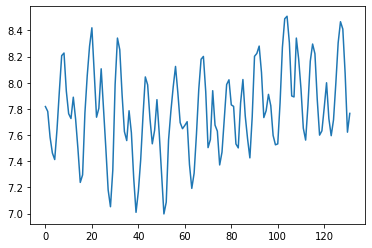

In [18]:
plt.plot(sst.values())

In [19]:
temperature = hcm3.OCNYDS('xosfb', 3000, 3010).temperature(mode_t='mean', mode_lon='value', value_lon=350)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNYDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing temperature.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ New longitude value : 350.0


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [349.375; 1]; lon_p: [349.375; 1]
lonb: [349.375; 1]; lonb_p: [349.375; 1]
lons: None; lons_p: None
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-88.75; -87.5; ...; 87.5; 88.75; 143]; latb_p: [-90.0; -88.75; ...; 88.75; 90.0; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-10.0; -20.0; ...; -4269.5; -4884.7998046875; 19]; z_p: [-10.0; -20.0; ...; -4269.5; -4884.7998046875; 19]
zb: [-5.0; -15.0; ...; -4577.14990234375; -5192.4501953125; 20]; zb_p: [-5.0; -15.0; ...; -4577.14990234375; -5192.4501953125; 20]
zs: [-10.0; -10.0; ...; -615.25; -615.30029296875; 19]; zs_p: [-10.0; -10.0; ...; -615.25; -615.30029296875; 19]
t: None
DATA: <xarray.DataArray 'temp_ym_dpth' (zb: 20, latitude: 144)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,  

Text(0, 0.5, 'depth (m)')

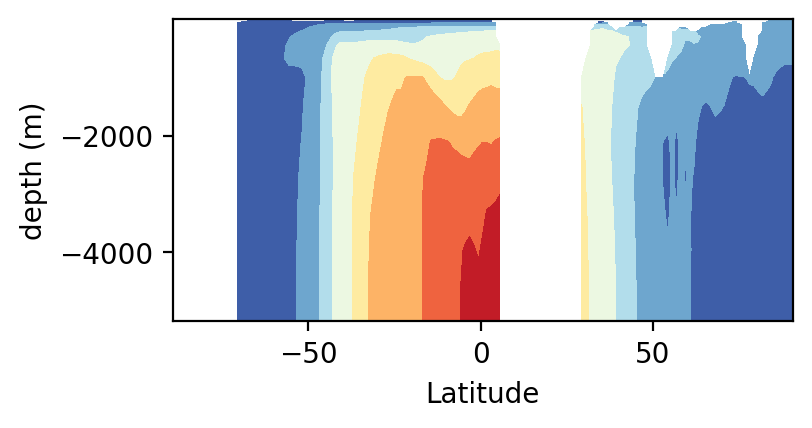

In [20]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.contourf(temperature.lat_p, temperature.zb_p, temperature.values(), cmap="RdYlBu_r")
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')

In [ ]:
hcm3.SSTMTS('xosfa', 4000, 4200)

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.SSTMTS'> : xosfa between years 4000 and 4200.


In [2]:
hcm3.SSTMTS('xosfa', 200, 7000)

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.SSTMTS'> : xosfa between years 200 and 7000.
Time elapsed for open_dataset : 0.2854928970336914


ValueError: Inavlid start_year or end_year. Please check that they fit the valid range
Valid range : start_year = 2551, end_year = 6192